In [13]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import ephem
from datetime import datetime, time, timedelta
from scipy import optimize
from mpl_toolkits.basemap import Basemap

import diurnal_config

# from diurnal_utils import *
%run diurnal_utils.py
%run fetch_model_helper.py

In [16]:
cmip_rel_dir = '/export/data1/cchristo/CMIP6_precip/pr_3hr_historical/'

input_data_dir_gpm = '/export/data1/cchristo/gpm_data/gpmdata_regridded_gfdl_cm4/2000/06/01/imerg/'
model_name = 'GFDL-CM4'

path_to_cmip_files =  get_path_to_desired_model_cmip6(cmip_rel_dir, 
                              desired_model= model_name,
                              desired_grid_types = ('gn', 'gr', 'gr1'))

In [15]:
# ds = xr.open_dataset(path_to_cmip_files[0])
ds = xr.open_mfdataset(input_data_dir_gpm + '*nc', combine = 'by_coords')


In [5]:
bin_interval = 3
bin_bool = True

time_ind = 4
time_id = 'time'
lon_id = 'lon'
lat_id = 'lat'

lon_mesh, lat_mesh = np.meshgrid(ds[lon_id].values, ds[lat_id].values)


if type(ds['time'][0].item()) == cftime._cftime.DatetimeNoLeap:
    dt_i = datetime.strptime(str(ds.isel(time = time_ind)[time_id].values.item()), '%Y-%m-%d %H:%M:%S')
else:
    dt_i = datetime.utcfromtimestamp(ds[time_id][time_ind].item() * 1e-9)
res = calc_solar_time(dt_i, 
                      lon_mesh,
                      bin_interval = bin_interval,
                      bin_bool = bin_bool)

2000-06-01 02:00:00


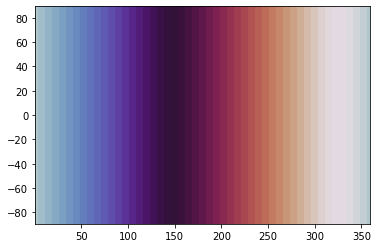

In [11]:
print(dt_i)
plt.pcolormesh(lon_mesh, lat_mesh, res, cmap = plt.get_cmap('twilight'))

In [38]:
%run diurnal_utils.py

In [6]:
%%time
local_hour_angle = np.zeros(lon_mesh.shape)

# for lat_ii in range(lon_mesh.shape[0]):
#     for lon_ii in range(lon_mesh.shape[1]):

local_hour_angle = calc_solar_time_ephem(dt_i, 
                                          lon_mesh,
                                          bin_interval = bin_interval,
                                          parallel = False, 
                                          bin_bool = bin_bool)
# res2 = hour_angle(dt_i, )

CPU times: user 301 ms, sys: 0 ns, total: 301 ms
Wall time: 300 ms


In [40]:
# local_hour_angle
# local_hour_angle

In [ ]:
#prev 
# CPU times: user 312 ms, sys: 1.9 ms, total: 314 ms
# Wall time: 313 ms

In [91]:
dt_i.strftime('%Y/%m/%d %H:%M:%S')

'2000/06/01 02:00:00'

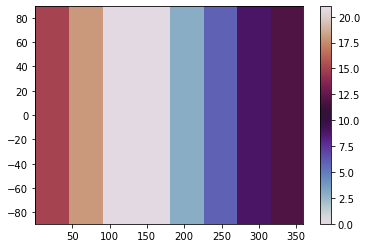

In [7]:
plt.pcolormesh(lon_mesh, lat_mesh, local_hour_angle, cmap = plt.get_cmap('twilight'))
plt.colorbar()

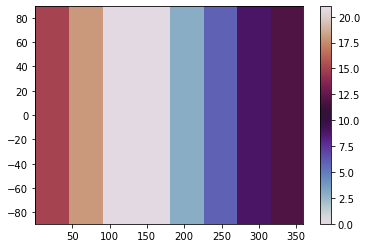

In [8]:
plt.pcolormesh(lon_mesh, lat_mesh, local_hour_angle, cmap = plt.get_cmap('twilight'))
plt.colorbar()

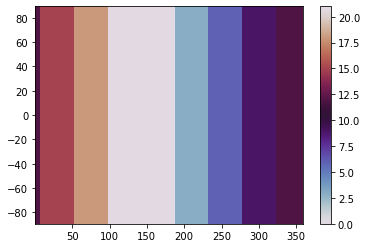

In [9]:
plt.pcolormesh(lon_mesh, lat_mesh, res, cmap = plt.get_cmap('twilight'))
plt.colorbar()

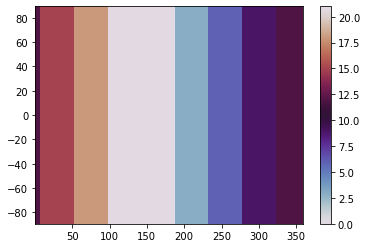

In [10]:
plt.pcolormesh(lon_mesh, lat_mesh, res, cmap = plt.get_cmap('twilight'))
plt.colorbar()

3.0


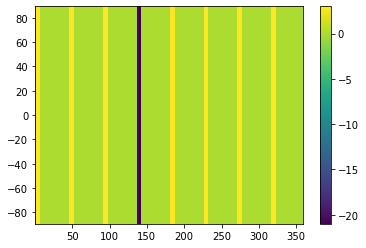

In [11]:
diff = local_hour_angle - res
plt.pcolormesh(lon_mesh, lat_mesh, diff)
plt.colorbar()
print(diff.max())

21.0


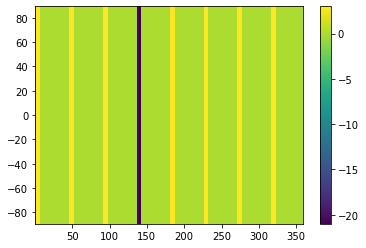

In [12]:
diff = local_hour_angle - res
plt.pcolormesh(lon_mesh, lat_mesh, diff)
plt.colorbar()
print(abs(diff).max())